# __Appendix A__

## Assignment 7: Build & Evaluate Unsupervised Learning Models
Dawud Ujamaa  
School of Technology & Engineering, National University  
TIM-8555: Predictive Analysis  
Dr. Larry Fulton  
December 22, 2024 

### __2. Complete Applied Question #9 on page 554 of ISLR Python.__
Consider the USArrests data. We will now perform hierarchical clustering on the states.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
import seaborn as sns
from sklearn.cluster import \
(KMeans ,
AgglomerativeClustering)
from scipy.cluster.hierarchy import \
(dendrogram ,
cut_tree)
from ISLP.cluster import compute_linkage

#### __(a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states__

In [2]:
# import the data
USArrests = get_rdataset('USArrests').data

# Use hierarchical clustering with complete linkage and Euclidean distance to cluster the states
HClust = AgglomerativeClustering
hc_comp1 = HClust(distance_threshold=0, n_clusters=None , linkage='complete')
hc_comp1.fit(USArrests)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

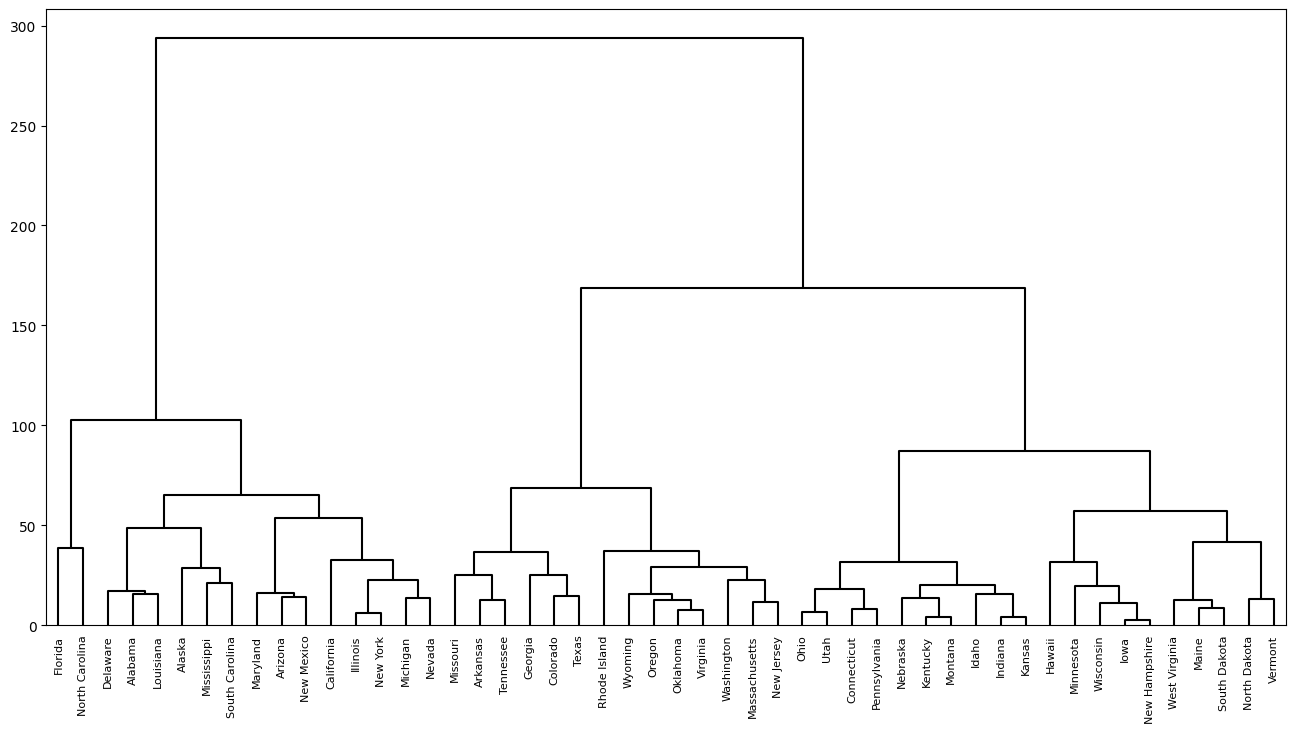

In [3]:
states = USArrests.index
cargs = {'color_threshold':-np.inf , 'above_threshold_color':'black'}
linkage_comp1 = compute_linkage(hc_comp1)
fig , ax = plt.subplots(1, 1, figsize=(16, 8))
dendrogram(linkage_comp1 , labels=states, ax=ax, **cargs);

#### __(b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?__

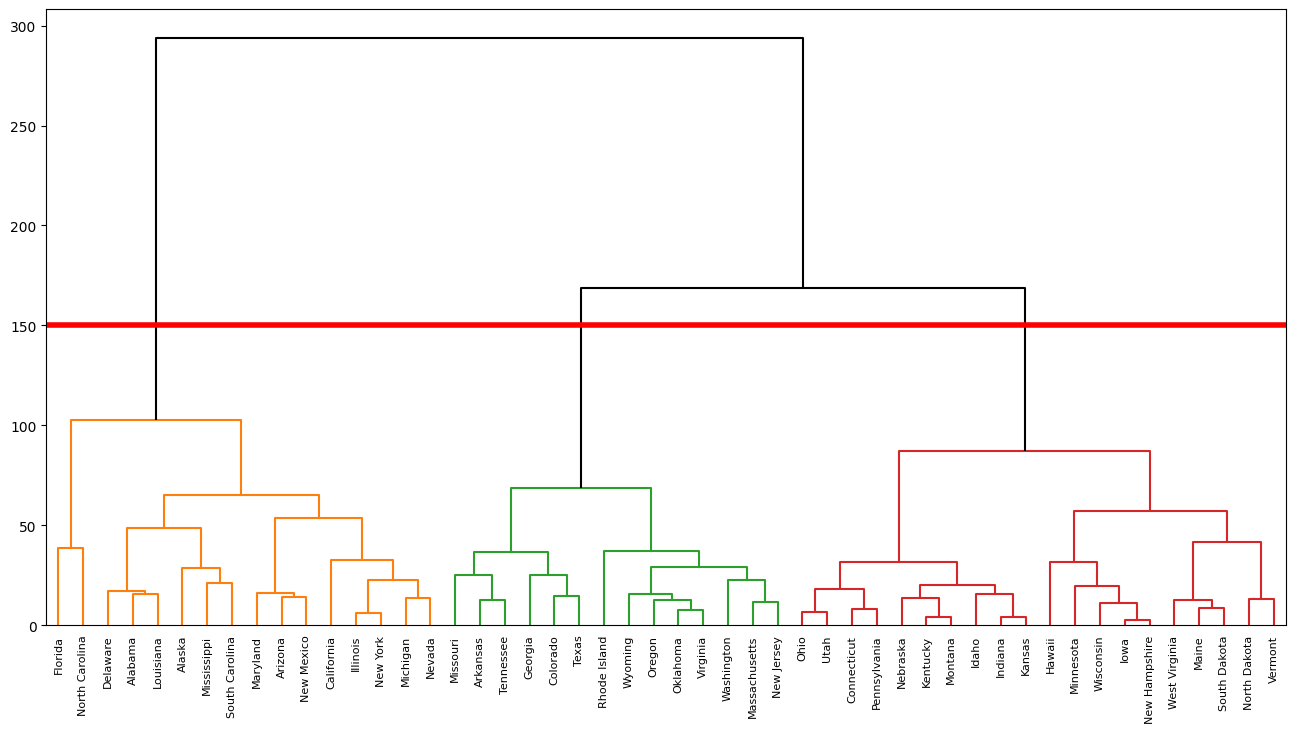

In [4]:
linkage_comp1 = compute_linkage(hc_comp1)
fig , ax = plt.subplots(1, 1, figsize=(16, 8))
dendrogram(linkage_comp1 , labels=states, ax=ax, color_threshold=150, above_threshold_color='black')
ax.axhline(150, c='r', linewidth=4);

In [5]:
StateHC1 = pd.DataFrame(zip(states, cut_tree(linkage_comp1 , n_clusters=3)),columns = ['state','cluster'])
OrangeCluster = StateHC1[StateHC1['cluster']==0]['state'].values.tolist()
GreenCluster = StateHC1[StateHC1['cluster']==1]['state'].values.tolist()
RedCluster = StateHC1[StateHC1['cluster']==2]['state'].values.tolist()
print("\n","OrangeCluster:", "\n", OrangeCluster)
print("\n","GreenCluster:", "\n", GreenCluster)
print("\n","RedCluster:", "\n", RedCluster)


 OrangeCluster: 
 ['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']

 GreenCluster: 
 ['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']

 RedCluster: 
 ['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']


#### __(c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.__

In [6]:
# scale the data
scaler = StandardScaler(with_std=True , with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)

# make data frame to check variance and mean
USArrests_scaled_df = pd.DataFrame(USArrests_scaled,columns = ['Murder', 'Assault', 'UrbanPop', 'Rape'])

In [7]:
# check variance before scaling
USArrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [8]:
# check variance after scaling
USArrests_scaled_df.var()

Murder      1.020408
Assault     1.020408
UrbanPop    1.020408
Rape        1.020408
dtype: float64

In [9]:
# check mean after scaling
USArrests_scaled_df.mean()

Murder     -7.105427e-17
Assault     1.387779e-16
UrbanPop   -4.396483e-16
Rape        8.593126e-16
dtype: float64

In [10]:
# Use hierarchical clustering with complete linkage and Euclidean distance to cluster the states after scaling the variables to have standard deviation one.
HClust = AgglomerativeClustering
hc_comp2 = HClust(distance_threshold=0, n_clusters=None , linkage='complete')
hc_comp2.fit(USArrests_scaled_df)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

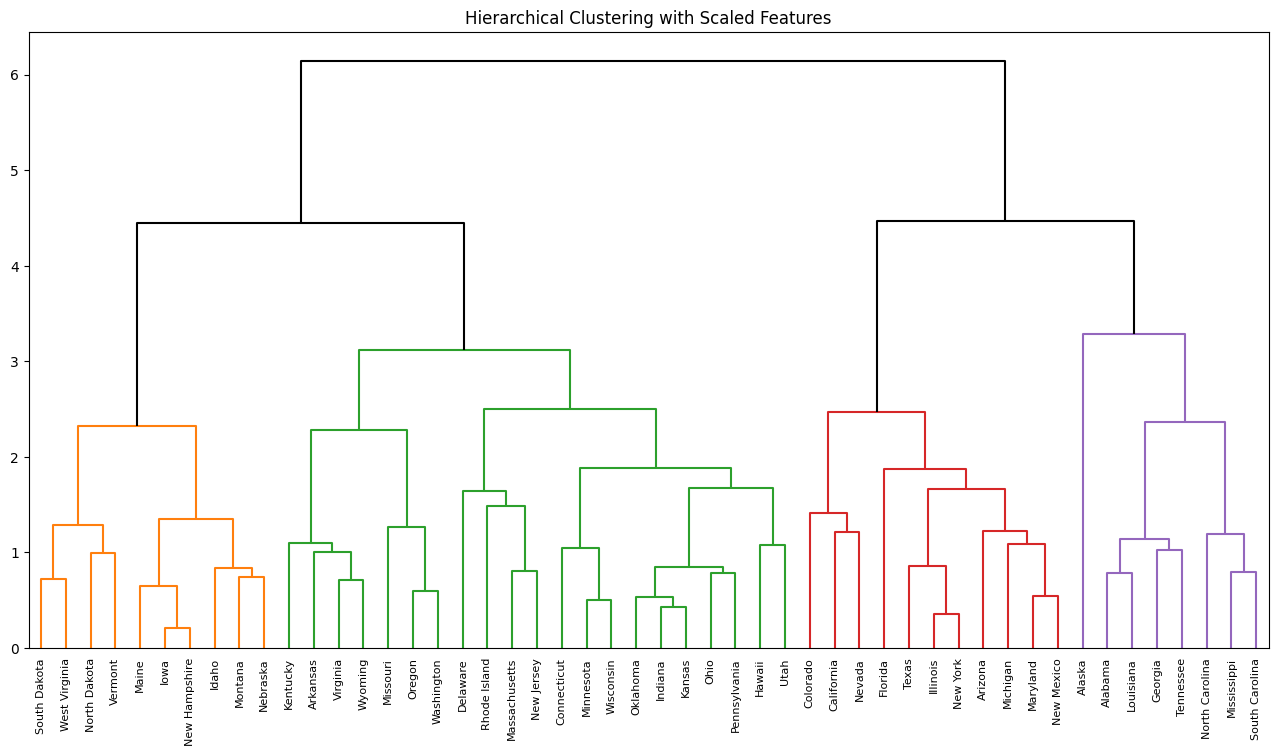

In [11]:
linkage_comp2 = compute_linkage(hc_comp2)
fig , ax = plt.subplots(1, 1, figsize=(16, 8))
dendrogram(linkage_comp2 , labels=states, ax=ax, color_threshold=4, above_threshold_color='black')
ax.set_title("Hierarchical Clustering with Scaled Features");

#### __(d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed?  Provide a justification for your answer.__

Before scaling, the maximum inter-observation dissimilarities between states were as high as 300, and after scaling the maximum inter-observation dissimilarities between states were only as high as 6.  A more even cluster of states was obtainable after scaling than before scaling.  It was possible to obtain 3 clusters before scaling, but after scaling, it was possible to obtain either 2 or 4 clusters but not 3 clusters.  Since Euclidean distance is used as the dissimilarity measure, and the variables are measured in different units with different scales with vastly different variances, then it makes sense to standardize the variables to have standard deviation one before computing inter-observation dissimilarities.

### __3. Download the  Wine Data for Clustering available on Kaggle.com__
https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

Download the  Wine Data for Clustering available on Kaggle.com. Conduct PCA to collapse correlated variables into a subset that includes 80% of the variance of the entirety of the data.  Then conduct k-means to identify clusters, and evaluate different values for k (e.g., 3, 4,…).  Finally, conduct hierarchical clustering.  Investigate assumptions.  Interpret all of your findings.

#### __EDA and Preprocessing__

In [12]:
# import data
Wine = pd.read_csv(r'./wine-clustering.csv')
Wine 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [13]:
# Generate descriptive statistics
Wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


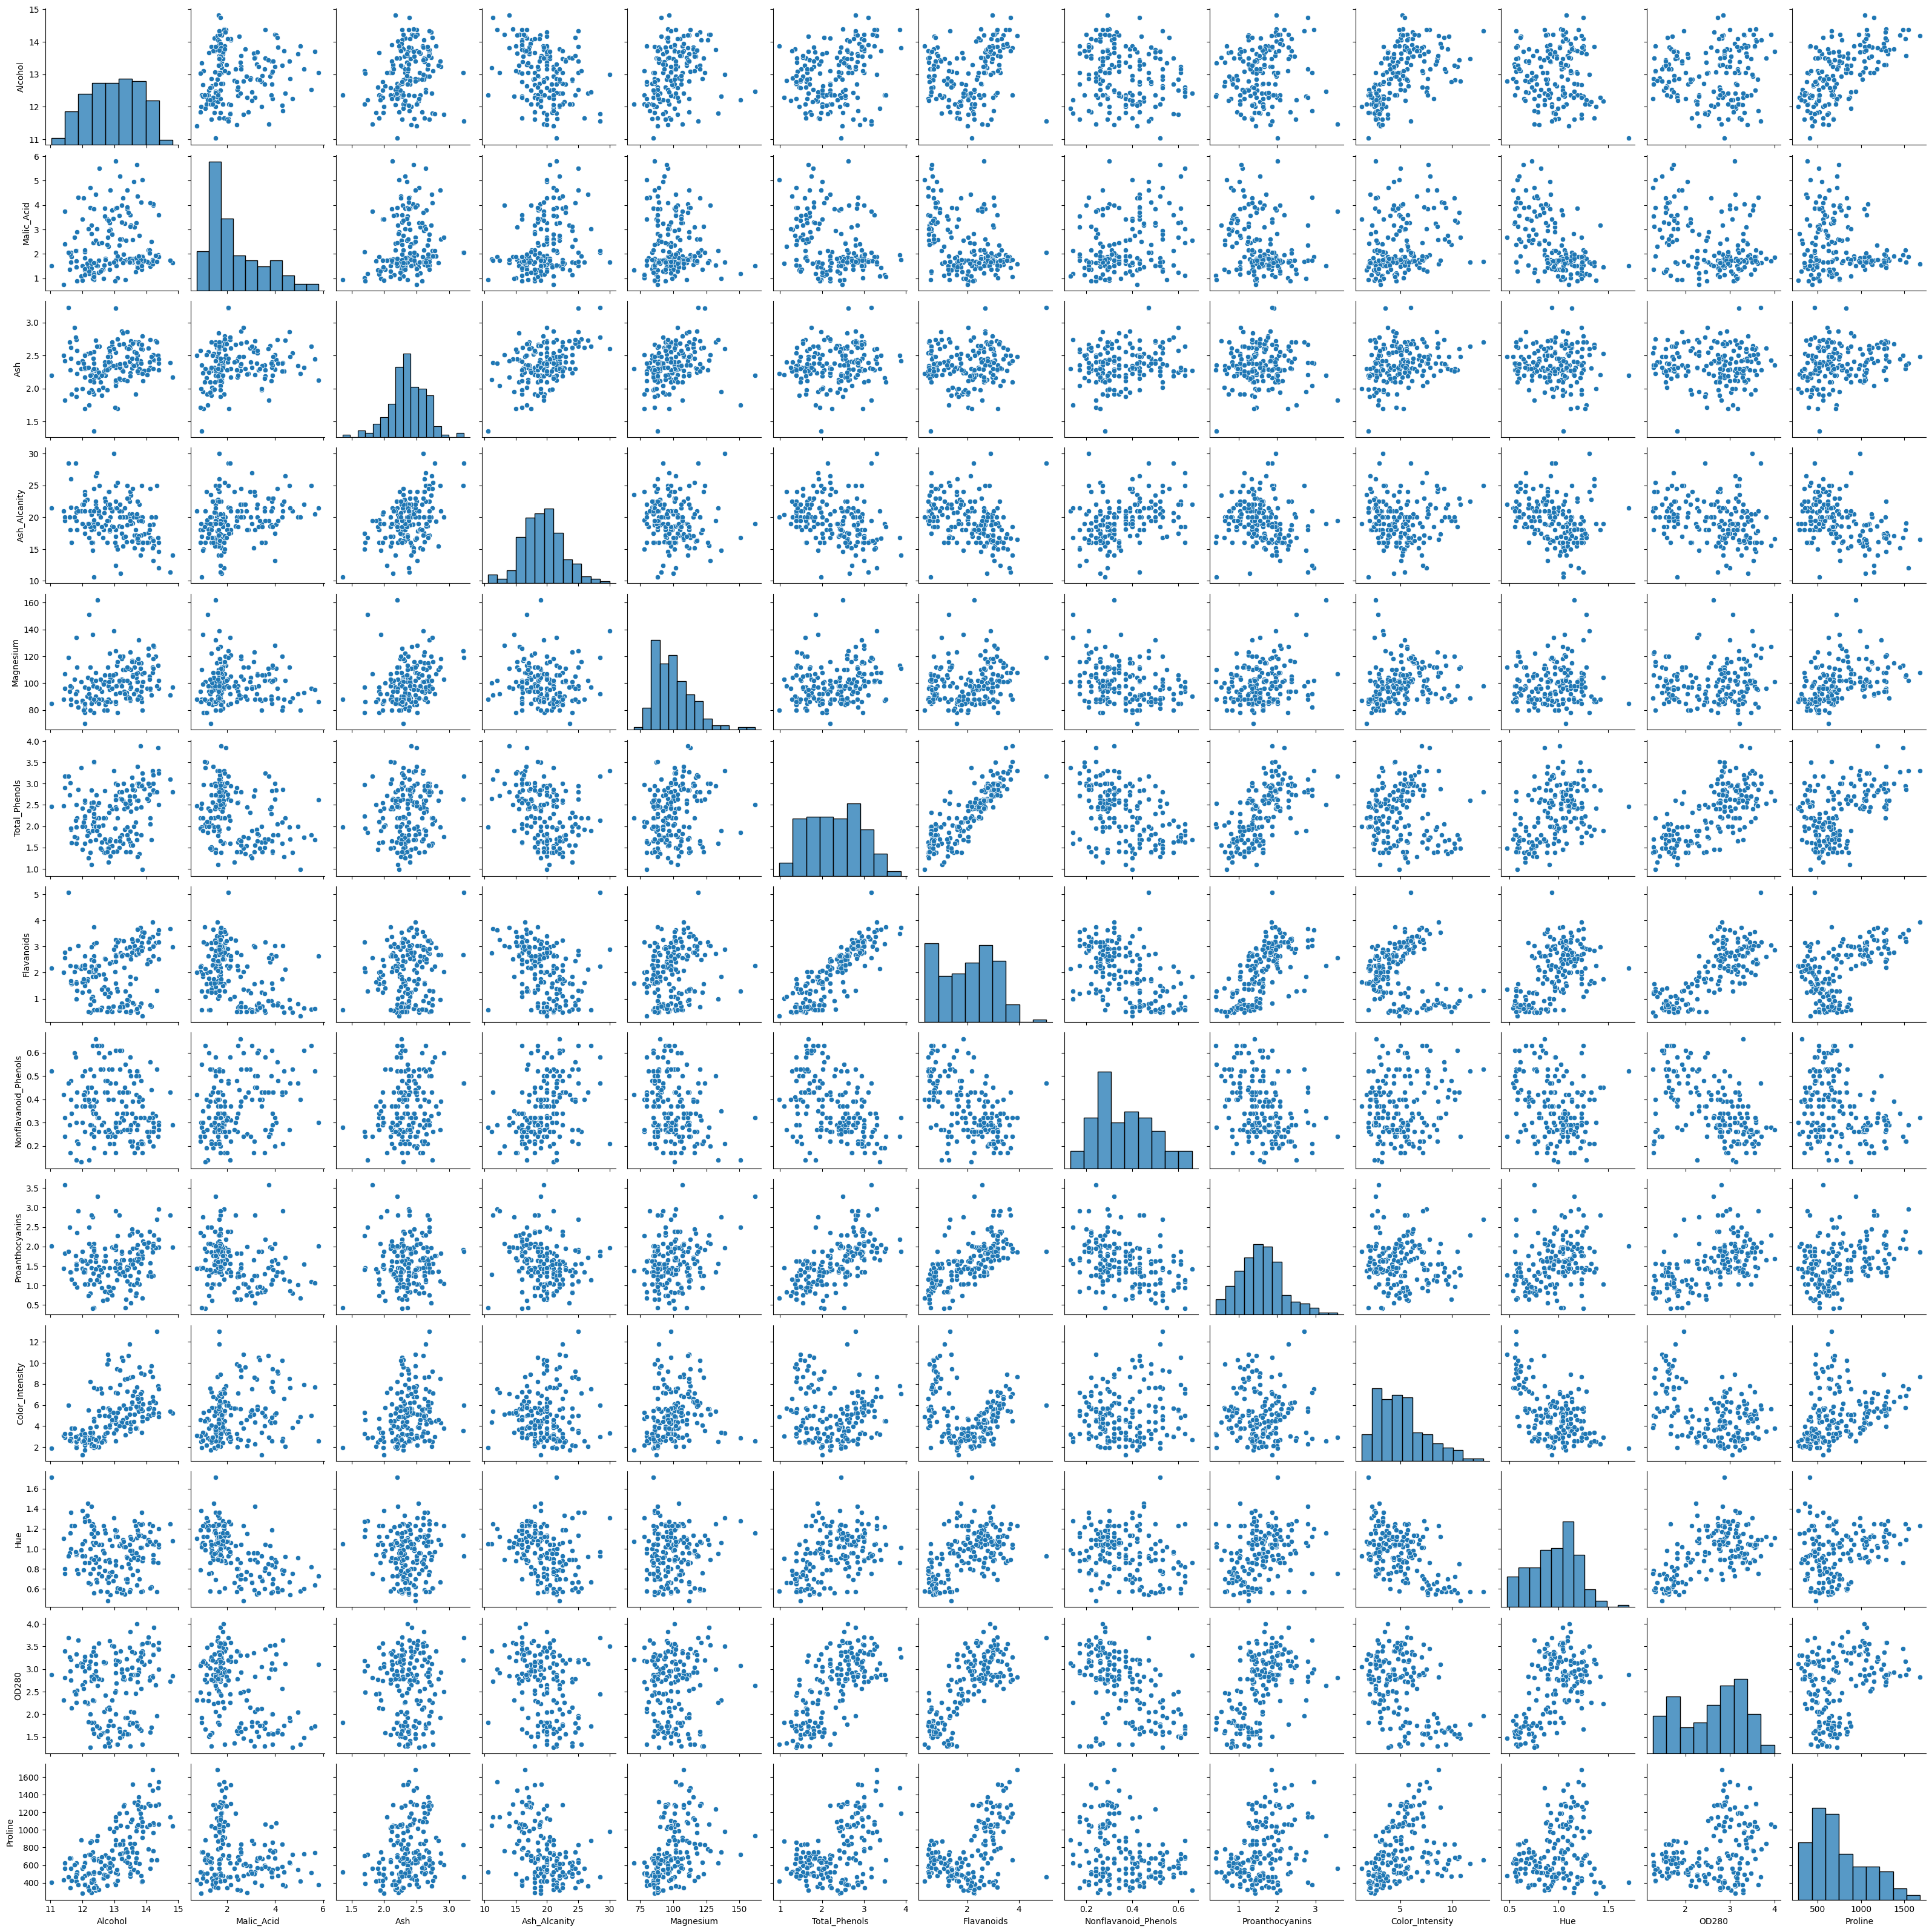

In [14]:
sns.pairplot(Wine)
plt.show()

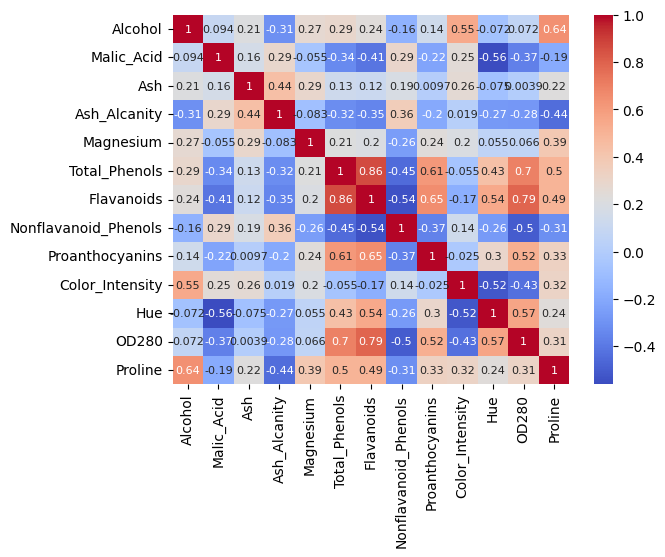

In [15]:
# compute correlation matrix
corr_matrix = Wine.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 8})
plt.show()

#### __Conduct PCA to collapse correlated variables into a subset that includes 80% of the variance of the entirety of the data__

In [16]:
# scale the data
scaler = StandardScaler(with_std=True , with_mean=True)
Wine_scaled = scaler.fit_transform(Wine)

# perform principal components analysis
pcaWine = PCA()
pcaWine.fit(Wine_scaled)

# The proportion of variance explained (PVE) by each principal component is stored as explained_variance_ratio_
pcaWine.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

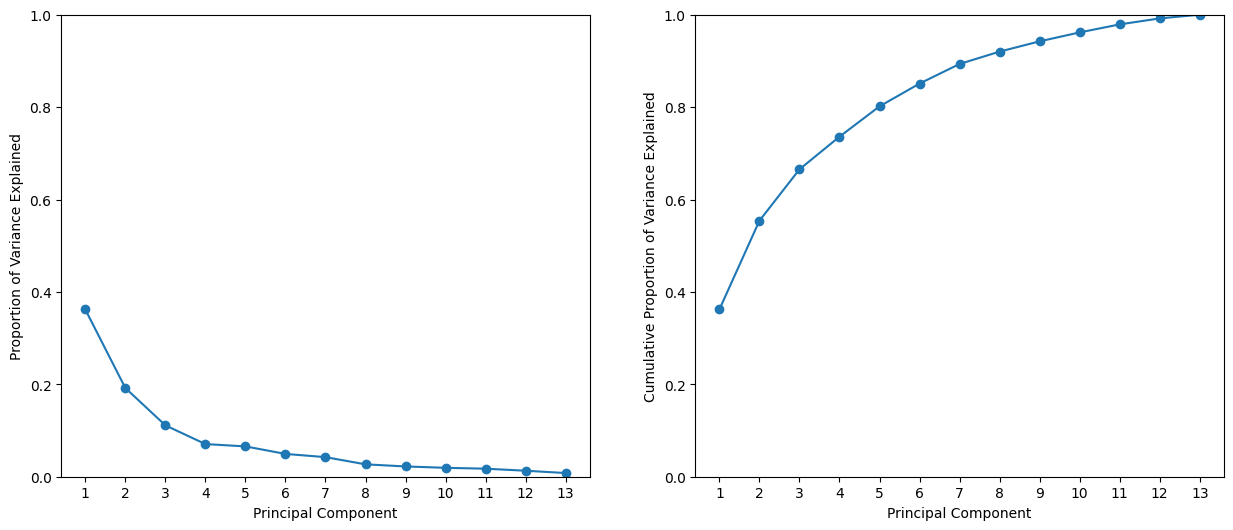

In [17]:
# plot the PVE explained by each component, as well as the cumulative PVE
fig , axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pcaWine.n_components_)+1
ax = axes[0]
ax.plot(ticks , pcaWine.explained_variance_ratio_ , marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

ax = axes[1]
ax.plot(ticks , pcaWine.explained_variance_ratio_.cumsum(), marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks);

The first five principal components explain 80.2% of the variance in the data.

In [18]:
# perform principal components analysis and only keep 5 components
pcaWine = PCA(n_components=5)
pcaWineData = pcaWine.fit_transform(Wine_scaled)

#### __After PCA, Conduct k-means to identify clusters, and evaluate different values for k (e.g., 3, 4,…)__

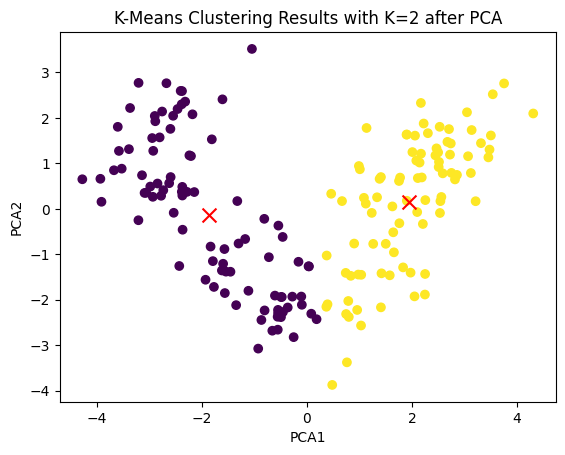

In [19]:
kmeans2 = KMeans(n_clusters=2, random_state=0, n_init=20).fit(pcaWineData)

# Get the cluster labels for each data point
labels = kmeans2.labels_

# Get the cluster centers
centers = kmeans2.cluster_centers_

# Plot the clusters
plt.scatter(pcaWineData[:, 0], pcaWineData[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=100, c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering Results with K=2 after PCA')
plt.show()

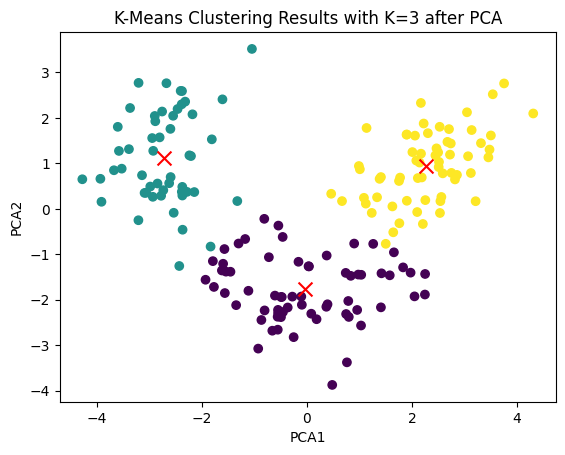

In [20]:
kmeans3 = KMeans(n_clusters=3, random_state=0, n_init=20).fit(pcaWineData)

# Get the cluster labels for each data point
labels = kmeans3.labels_

# Get the cluster centers
centers = kmeans3.cluster_centers_

# Plot the clusters
plt.scatter(pcaWineData[:, 0], pcaWineData[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=100, c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering Results with K=3 after PCA')
plt.show();

In [21]:
IDkm3clusters = pd.DataFrame(kmeans3.cluster_centers_)
IDkm3clusters

,0,1,2,3,4
0,-0.036957,-1.772239,0.186139,0.080240,0.070878
1,-2.720036,1.125651,-0.239093,0.062457,0.073676
2,2.276194,0.932054,0.001528,-0.135498,-0.134912


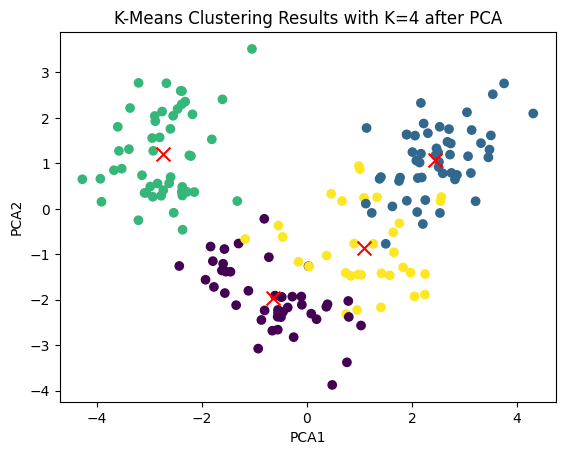

In [22]:
kmeans4 = KMeans(n_clusters=4, random_state=0, n_init=20).fit(pcaWineData)

# Get the cluster labels for each data point
labels = kmeans4.labels_

# Get the cluster centers
centers = kmeans4.cluster_centers_

# Plot the clusters
plt.scatter(pcaWineData[:, 0], pcaWineData[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=100, c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering Results with K=4 after PCA')
plt.show();

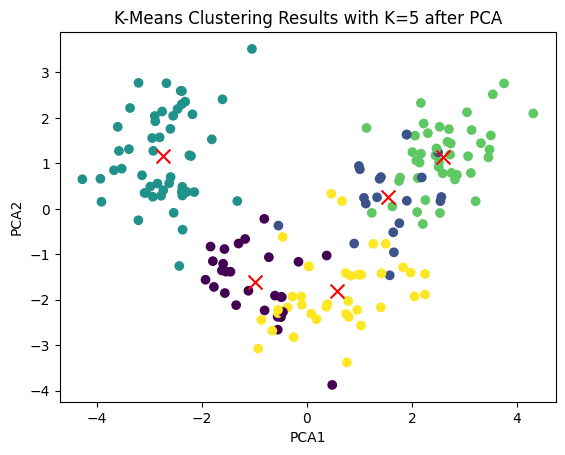

In [23]:
kmeans5 = KMeans(n_clusters=5, random_state=0, n_init=20).fit(pcaWineData)

# Get the cluster labels for each data point
labels = kmeans5.labels_

# Get the cluster centers
centers = kmeans5.cluster_centers_

# Plot the clusters
plt.scatter(pcaWineData[:, 0], pcaWineData[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=100, c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering Results with K=5 after PCA')
plt.show();

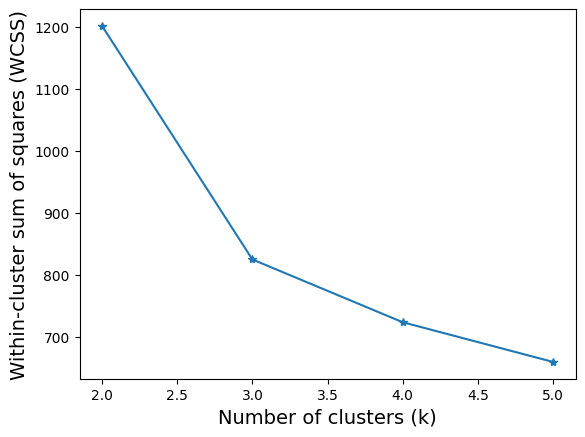

In [24]:
# Fit k-means clustering with k=1,...,5 and save WCSS for each
WCSS = []
k = [2, 3, 4, 5]
for j in k:
    kmModel = KMeans(n_clusters=j, random_state=0, n_init=20)
    kmModel = kmModel.fit(pcaWineData)
    WCSS.append(kmModel.inertia_)

# Plot the WCSS for each cluster
ax = plt.figure().gca()
plt.plot(k, WCSS, '*-')
plt.xlabel('Number of clusters (k)', fontsize=14);
plt.ylabel('Within-cluster sum of squares (WCSS)', fontsize=14);

In [25]:
# list the observations in each cluster of k=3
km3cluster = pd.DataFrame(zip(Wine.index, kmeans3.labels_),columns = ['obs','cluster'])
Cluster0 = km3cluster[km3cluster['cluster']==0]['obs'].values.tolist()
Cluster1 = km3cluster[km3cluster['cluster']==1]['obs'].values.tolist()
Cluster2 = km3cluster[km3cluster['cluster']==2]['obs'].values.tolist()
print("\n","Cluster0: length=",len(Cluster0), "\n", Cluster0)
print("\n","Cluster1: length=",len(Cluster1), "\n", Cluster1)
print("\n","Cluster2: length=",len(Cluster2), "\n", Cluster2)


 Cluster0: length= 65 
 [59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129]

 Cluster1: length= 51 
 [61, 83, 118, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]

 Cluster2: length= 62 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 73, 95, 121]


#### __Conduct hierarchical clustering__

In [26]:
# Use hierarchical clustering with complete linkage and Euclidean distance on scaled data
HClust = AgglomerativeClustering
hc_comp3 = HClust(distance_threshold=0, n_clusters=None , linkage='complete')
hc_comp3.fit(Wine_scaled)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

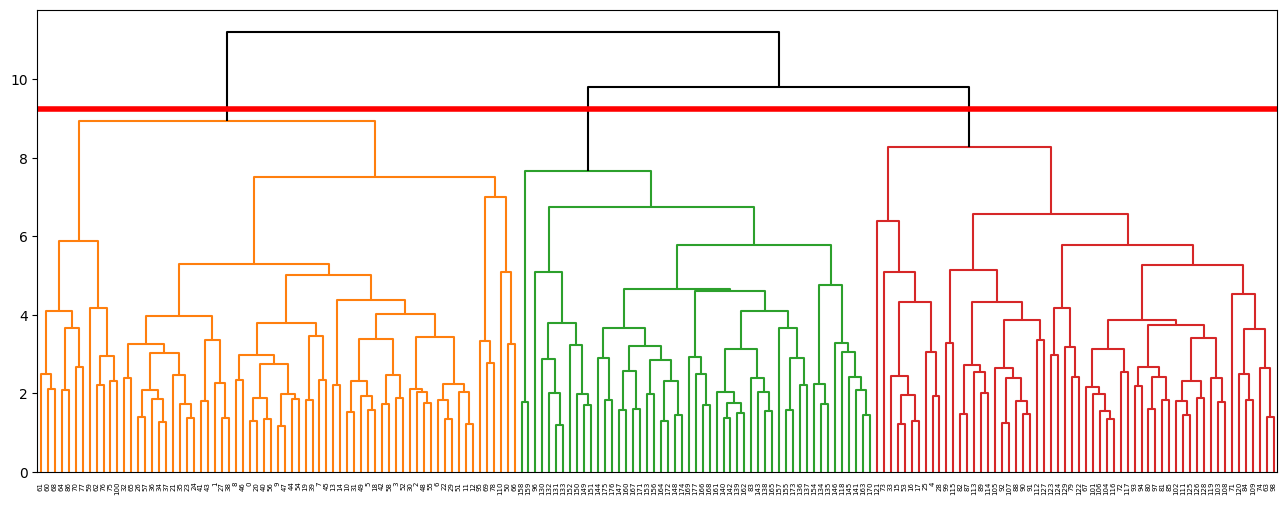

In [27]:
linkage_comp3 = compute_linkage(hc_comp3)
fig , ax = plt.subplots(1, 1, figsize=(16, 6))
dendrogram(linkage_comp3 , ax=ax, color_threshold=9.25, above_threshold_color='black')
ax.axhline(9.25, c='r', linewidth=4);

In [28]:
WineHC = pd.DataFrame(zip(Wine.index, cut_tree(linkage_comp3 , n_clusters=3)),columns = ['obs','cluster'])
OrangeCluster = WineHC[WineHC['cluster']==0]['obs'].values.tolist()
GreenCluster = WineHC[WineHC['cluster']==1]['obs'].values.tolist()
RedCluster = WineHC[WineHC['cluster']==2]['obs'].values.tolist()
print("\n","OrangeCluster: length=",len(OrangeCluster), "\n", OrangeCluster)
print("\n","GreenCluster: length=",len(GreenCluster), "\n", GreenCluster)
print("\n","RedCluster: length=",len(RedCluster), "\n", RedCluster)


 OrangeCluster: length= 69 
 [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 68, 69, 70, 75, 76, 77, 78, 86, 95, 100, 110]

 GreenCluster: length= 58 
 [4, 15, 16, 17, 25, 28, 33, 53, 63, 67, 71, 72, 73, 74, 79, 80, 81, 82, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]

 RedCluster: length= 51 
 [83, 96, 118, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]


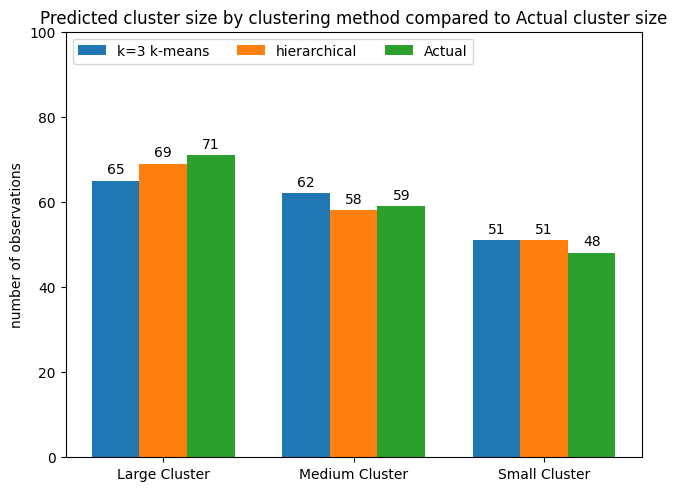

In [29]:
# compare groups from k-3 k-means clustering and hierarchical clustering
methods = ("Large Cluster", "Medium Cluster", "Small Cluster")

cluster_sizes = {
    'k=3 k-means': (len(Cluster0) , len(Cluster2), len(Cluster1)),
    'hierarchical': (len(OrangeCluster) , len(GreenCluster), len(RedCluster) ),
    'Actual': (71 , 59, 48 ),
}

x = np.arange(len(methods))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in cluster_sizes.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of observations')
ax.set_title('Predicted cluster size by clustering method compared to Actual cluster size')
ax.set_xticks(x + width, methods)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)

plt.show()

In [30]:
# Print Python version
import sys
print(sys.version)

# Print Jupyter notebook version
import notebook
notebook.__version__

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


'7.2.2'

In [31]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.29.0
ipykernel        : 6.29.5
ipywidgets       : not installed
jupyter_client   : 8.6.3
jupyter_core     : 5.7.2
jupyter_server   : 2.14.2
jupyterlab       : 4.2.6
nbclient         : 0.10.0
nbconvert        : 7.16.4
nbformat         : 5.10.4
notebook         : 7.2.2
qtconsole        : not installed
traitlets        : 5.14.3
